# **Modelos de Regresión**

En este laboratorio se reforzará el uso de la biblioteca **scikit-learn** para implementar la regresión lineal simple y la regresión no lineal. Primero se trabajará un conjunto de datos relacionado con el consumo de combustible y la emisión de dióxido de carbono de los automóviles. Luego, se dividirán los datos en conjuntos de entrenamiento y prueba, se creará un modelo usando el conjunto de entrenamiento, se evaluará su modelo usando el conjunto de prueba y finalmente se usará el modelo para predecir el valor desconocido.

Si los datos muestran una tendencia con curvas, la regresión lineal no producirá resultados muy precisos en comparación con una regresión no lineal porque, como su nombre lo indica, la regresión lineal supone que los datos son lineales. Por este motivo, se reforzarán los conceptos sobre regresiones no lineales y se aplicará en un ejemplo con un conjunto de datos relacionado con el PIB de China desde 1960 hasta 2014.

## Tabla de Contenidos

1.  [Importar y Preparar los Datos de Análisis](#2)
2.  [Modelo de Regresión Simple](#4)
3.  [Modelos de Regresión No Lineales](#6)
4.  [Ejemplo de una Regresión No Lineal](#8)

# 1. Importar y Preparar los Datos de Análisis <a id="2"></a>

## Carga y Preparación de Datos

Instalar e importar Bibliotecas:

In [49]:
# Instalar bibliotecas específicas para trabajar en el laboratorio

!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install sklearn
!pip3 install seaborn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Importar los paquetes de procesamiento y visualización de datos **pandas**, **numpy**, **matplotlib**, **sklearn** y **scipy**. No olvidar de poner `% matplotlib inline` para que las gráficas puedan aparecer en *Jupyter Notebook*.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from scipy import stats
%matplotlib inline

## Leer el Conjunto de Datos

Actualmente, se tiene clasificado el apoyo que brindan los padres a estudiantes de secundaria en cinco grupos. Si la utilización de los datos demográficos puede servirnos para predecir a que grupo pertenecen, el establecimiento educativo podría tomar medidas oportunas para potenciar el apoyo en la relación entre estudiantes y padres, en beneficio del desempeño estudiantil de los hijos. Así, esto sería un problema de clasificación. Es decir, dado el conjunto de datos con etiquetas predefinidas, se necesita construir un modelo para predecir la clase de un caso nuevo o desconocido.

Para este caso, se usarán datos demográficos, como Edad, Género, Etnicidad y Nivel Educativo de los Padres.

El campo de destino, llamado `ParentalSupport`, tiene cinco valores posibles que corresponden a los cinco niveles de apoyo de los padres, de la siguiente manera:

0. Ninguno
1. Bajo
2. Moderado
3. Alto
4. Muy alto



Cargar los datos y guardarlos en el dataframe `df`:

In [51]:
# ruta de datos y leer los datos para guardarlos en df

path='datos/banana_quality.csv'
df = pd.read_csv(path)

In [52]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality         object
dtype: object

In [53]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


Inicialmente el DataFrame contiene una columna llamada **Quality**, la cuál contiene dos valores tipo object, Good y Bad, que fueron cambiados a 1 y 0 respectivamente, para poder estudiar la correlación entre las variables 

In [54]:
df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})

C:\Users\HP SSD\AppData\Local\Temp\ipykernel_4728\842005656.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Quality'] = df['Quality'].replace({'Good': 1, 'Bad': 0})


In [55]:
# mostrar los 5 primeros registros de conjunto de datos

df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,1
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,1
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,1
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,1
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,1


## Pre-procesamiento de los Datos

Primero se va a realizar un rápido análisis y visualización de los Datos. Se utilizara el metodo `df.value_counts()`, para observar cuántos clientes hay en cada clase en el conjunto de datos.

In [56]:
df['Quality'].value_counts()

Quality
1    4006
0    3994
Name: count, dtype: int64

Como se puede observar, hay 212 clientes en Ninguno (0), 254 clientes en Muy alto (4), 489 clientes en Bajo (1), 697 clientes en Alto (3) y 740 clientes en Moderado (2).

In [57]:
df.corr(numeric_only=True)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


In [58]:
df.dtypes

Size           float64
Weight         float64
Sweetness      float64
Softness       float64
HarvestTime    float64
Ripeness       float64
Acidity        float64
Quality          int64
dtype: object

## Correlación
Aqui podemos ver las correlaciones que existen entre las variables del dataset. Se entiende por correlación como la que indicará la **fuerza** y **dirección** de una relación lineal y proporcionalidad entre dos variables estadísticas

In [59]:
df.corr(numeric_only=True)

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
Size,1.000000,-0.181933,-0.258027,0.164526,0.582014,0.042587,-0.140673,0.352983
Weight,-0.181933,1.000000,0.422683,-0.189908,-0.079465,-0.035276,0.443879,0.388789
Sweetness,-0.258027,0.422683,1.000000,-0.095338,-0.201657,0.180095,0.187059,0.377220
Softness,0.164526,-0.189908,-0.095338,1.000000,0.194734,-0.253804,-0.146014,-0.001637
HarvestTime,0.582014,-0.079465,-0.201657,0.194734,1.000000,0.107127,-0.090903,0.376600
Ripeness,0.042587,-0.035276,0.180095,-0.253804,0.107127,1.000000,-0.351531,0.350503
Acidity,-0.140673,0.443879,0.187059,-0.146014,-0.090903,-0.351531,1.000000,-0.000860
Quality,0.352983,0.388789,0.377220,-0.001637,0.376600,0.350503,-0.000860,1.000000


In [60]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Weight'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3887889014342623  con un valor de P = 5.513984954425239e-287


In [61]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Size'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.35298288717138604  con un valor de P = 1.960547470665041e-233


In [62]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Sweetness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.37721998620869324  con un valor de P = 6.195977428804751e-269


In [63]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Softness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0016374770035392045  con un valor de P = 0.8835759406046256


In [64]:
coeficiente_pearson, valor_p = stats.pearsonr(df['HarvestTime'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.3766002028322521  con un valor de P = 5.477675102993626e-268


In [65]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Ripeness'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.350503385265196  con un valor de P = 5.656660876896538e-230


In [66]:
coeficiente_pearson, valor_p = stats.pearsonr(df['Acidity'], df['Quality'])
print("El coeficiente de la Correlación de Pearson es", coeficiente_pearson, " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es -0.0008596341117588012  con un valor de P = 0.9387221807334138


Como **valor P** entre la suavidad y acidez con la calidad, es mayor a 0,1, esto nos indica que no existe una significancia estadistica entre estas dos variables con respecto a la calidad, por lo tanto eliminaremos estas dos variables, para poder alimentar al modelo con variables que si son significativas para nuestra variable objetivo 

In [67]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [68]:
X = df[['Size', 'Weight', 'Sweetness', 'HarvestTime', 'Ripeness']].values  #.astype(float)
X[0:5]


array([[-1.9249682 ,  0.46807805,  3.0778325 ,  0.2947986 ,  2.4355695 ],
       [-2.4097514 ,  0.48686993,  0.34692144, -0.8922133 ,  2.0675488 ],
       [-0.3576066 ,  1.4831762 ,  1.5684522 , -0.64726734,  3.0906434 ],
       [-0.8685235 ,  1.5662014 ,  1.8896049 , -1.0062776 ,  1.8730015 ],
       [ 0.65182525,  1.3191992 , -0.02245899, -1.430692  ,  1.0783454 ]])

In [69]:
y = df['Quality'].values
y[0:5]

array([1, 1, 1, 1, 1])

In [70]:
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-0.55113643,  0.60972933,  1.97505067,  0.52395094,  0.78256769],
       [-0.77810662,  0.61905159,  0.57338529, -0.07058475,  0.60849327],
       [ 0.18268513,  1.11329814,  1.20034726,  0.05210072,  1.09241877],
       [-0.05652058,  1.15448519,  1.36518186, -0.12771585,  0.51647206],
       [ 0.65529008,  1.0319526 ,  0.38379736, -0.34029123,  0.14059836]])

## Configuración modelo

In [71]:
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Conjunto de Entrenamiento set:', X_entrena.shape,  y_entrena.shape)
print ('Conjunto de Prueba:', X_prueba.shape,  y_prueba.shape)

Conjunto de Entrenamiento set: (6400, 5) (6400,)
Conjunto de Prueba: (1600, 5) (1600,)


In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
k = 9

# Crear y entrenar el modelo y pronosticar  
vecino = KNeighborsClassifier(n_neighbors = k)
vecino.fit(X_entrena,y_entrena)
vecino

KNeighborsClassifier(n_neighbors=9)

In [74]:
y_hat = vecino.predict(X_prueba)
y_hat[0:5]

array([0, 0, 0, 1, 1])

In [75]:
print("Precisión del conjunto de entrenamiento: ", metrics.accuracy_score(y_entrena, vecino.predict(X_entrena)))
print("Precisión del conjunto de prueba: ", metrics.accuracy_score(y_prueba, y_hat))

Precisión del conjunto de entrenamiento:  0.9328125
Precisión del conjunto de prueba:  0.9325


In [76]:
Ks = 20
prec_promedio = np.zeros((Ks-1))
prec_estandar = np.zeros((Ks-1))
matriz_confusion = [];
for n in range(1,Ks):
    # Entrena el modelo y pronostica  
    vecino_n = KNeighborsClassifier(n_neighbors = n).fit(X_entrena,y_entrena)
    y_hat=vecino_n.predict(X_prueba)
    prec_promedio[n-1] = metrics.accuracy_score(y_prueba, y_hat)
    prec_estandar[n-1] = np.std(y_hat==y_prueba)/np.sqrt(y_hat.shape[0])

print('Precisión promedio: ',prec_promedio)
print('Precisión desviación estándar: ',prec_estandar)

Precisión promedio:  [0.89625  0.90125  0.925    0.9225   0.93     0.925    0.93125  0.930625
 0.9325   0.92875  0.931875 0.9325   0.93375  0.934375 0.93375  0.931875
 0.9325   0.934375 0.9325  ]
Precisión desviación estándar:  [0.0076234  0.00745815 0.00658478 0.00668458 0.00637868 0.00658478
 0.00632571 0.00635227 0.00627215 0.00643105 0.00629901 0.00627215
 0.00621796 0.00619064 0.00621796 0.00629901 0.00627215 0.00619064
 0.00627215]


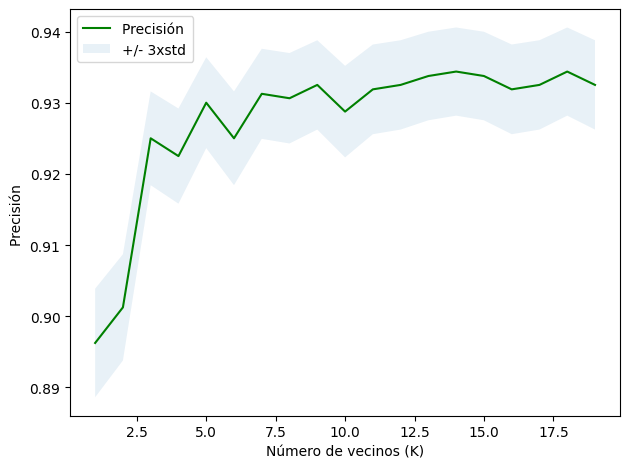

In [77]:
plt.plot(range(1,Ks),prec_promedio,'g')
plt.fill_between(range(1,Ks),prec_promedio - 1 * prec_estandar,prec_promedio + 1 * prec_estandar, alpha=0.10)
plt.legend(('Precisión ', '+/- 3xstd'))
plt.ylabel('Precisión ')
plt.xlabel('Número de vecinos (K)')
plt.tight_layout()
plt.show()

In [78]:
print( "La mejor precisión se obtuvo con", prec_promedio.max(), "con k=", prec_promedio.argmax()+1) 

La mejor precisión se obtuvo con 0.934375 con k= 14
